In [29]:
import pandas as pd
import numpy as np
# from pymannkendall import original_test

# from kats.detectors.cusum import CUSUMDetector
# from kats.consts import TimeSeriesData

from scipy.stats import linregress
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# # 示例数据：3个时间序列（列：'A', 'B', 'C'）
# dates = pd.date_range(start='2020-01-01', periods=100, freq='M')
# data = pd.DataFrame({
#     'A': np.random.randn(100).cumsum() + 5,  # 含趋势
#     'B': np.random.randn(100) + 10,          # 无趋势（白噪声）
#     'C': np.random.randn(100).cumsum() - 5   # 含趋势
# }, index=dates)

In [50]:
df=pd.read_csv('C:\\FILES_202305\\202504养鸡项目\\chickenfarming\\data\\data_cleaned\\all_dead_data.csv')
df=df[['ID_NUM','Age','Dead','Weak','Lame_Paralysis','Mortality']]
df.fillna(0,inplace=True)
df['sick']=df['Weak']+df['Lame_Paralysis']
df=df[(df['Age']<=36) & (df['Age']>=0)]

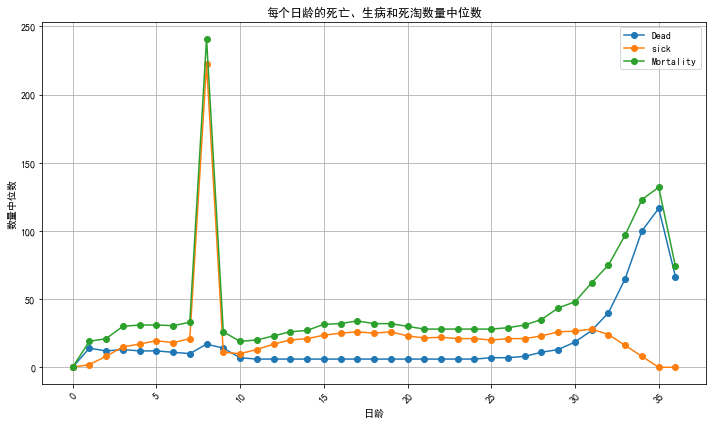

In [56]:
# 按日龄分组，计算死亡数量、生病数量和死淘数量的中位数
grouped = df.groupby('Age')
medians = grouped[['Dead', 'sick', 'Mortality']].median()

# 绘制图表
plt.figure(figsize=(10, 6))
for column in medians.columns:
    plt.plot(medians.index, medians[column], marker='o', label=column)

# 设置图表标题和标签
plt.title('每个日龄的死亡、生病和死淘数量中位数')
plt.xlabel('日龄')
plt.xticks(rotation=45)
plt.ylabel('数量中位数')
plt.legend()
plt.grid(True)

# 显示图表
plt.tight_layout()
plt.show()

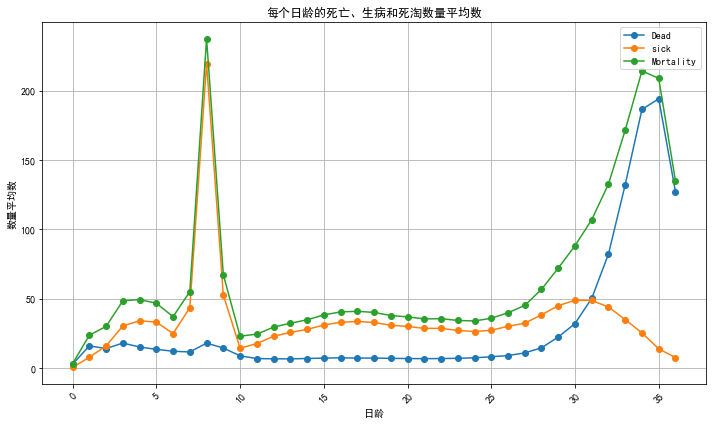

In [ ]:
# 按日龄分组，计算死亡数量、生病数量和死淘数量的平均数
grouped = df.groupby('Age')
means = grouped[['Dead', 'sick', 'Mortality']].mean()

# 绘制图表
plt.figure(figsize=(10, 6))
for column in means.columns:
    plt.plot(means.index, means[column], marker='o', label=column)

# 设置图表标题和标签
plt.title('每个日龄的死亡、生病和死淘数量平均数')
plt.xlabel('日龄')
plt.xticks(rotation=45)
plt.ylabel('数量平均数')
plt.legend()
plt.grid(True)

# 显示图表
plt.tight_layout()
plt.show()

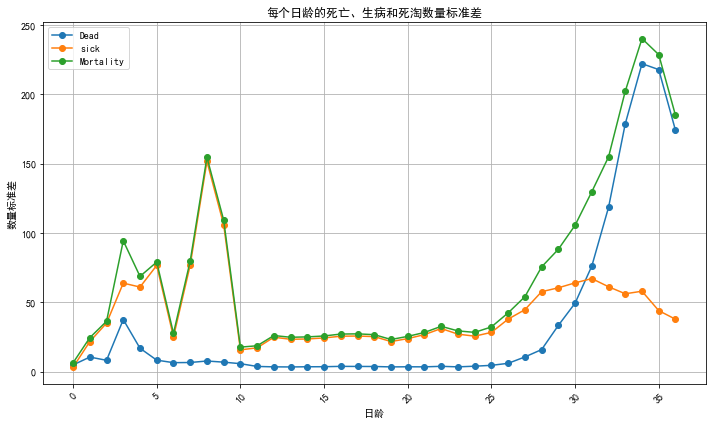

In [ ]:
# 按日龄分组，计算死亡数量、生病数量和死淘数量的标准数
grouped = df.groupby('Age')
stds = grouped[['Dead', 'sick', 'Mortality']].std()

# 绘制图表
plt.figure(figsize=(10, 6))
for column in stds.columns:
    plt.plot(stds.index, stds[column], marker='o', label=column)

# 设置图表标题和标签
plt.title('每个日龄的死亡、生病和死淘数量标准差')
plt.xlabel('日龄')
plt.xticks(rotation=45)
plt.ylabel('数量标准差')
plt.legend()
plt.grid(True)

# 显示图表
plt.tight_layout()
plt.show()

In [53]:
# 按日龄分组，并对死亡、生病、死淘数量进行聚合操作
grouped = df.groupby('Age')
stats = grouped.agg({
    'Dead': ['mean', 'median', 'std'],
    'sick': ['mean', 'median', 'std'],
    'Mortality': ['mean', 'median', 'std']
})

# 重新设置列名，使其更清晰
stats.columns = ['_'.join(col).strip() for col in stats.columns.values]

stats.to_csv('./死淘数据按日龄统计.csv')

In [48]:
# 按鸡舍编号分组
grouped = df.groupby('ID_NUM')

# 存储每个鸡舍是否有倒U型趋势的结果
results = {}

# 对每个鸡舍的时间序列进行检验
for house_id, group in grouped:
    ages = group['Age'].values
    dead_numbers = group['Weak'].values

    # 进行二次多项式拟合
    coefficients = np.polyfit(ages, dead_numbers, 2)
    a, b, c = coefficients

    # 判断是否为倒U型趋势（a < 0）
    is_inverted_u = a < 0

    # 同时，为了更准确，可以进一步检查拟合优度（这里简单使用线性回归的 r 平方值来近似）
    _, _, r_value, _, _ = linregress(ages, dead_numbers)
    r_squared = r_value ** 2

    # 可以设置一个 r 平方值的阈值，例如 0.5，来过滤掉拟合效果不好的情况
    if r_squared > 0.1:
        results[house_id] = is_inverted_u
    else:
        results[house_id] = False

In [49]:
[k for k, v in results.items() if v ] 

['G00_71_H2',
 'G00_73_H2',
 'G01A_63_H1',
 'G01A_63_H2',
 'G03_66_H2',
 'G06_65_H14',
 'G06_66_H7',
 'G08_65_H18',
 'G09_65_H2',
 'G09_66_H13',
 'G09_66_H15',
 'G09_66_H16',
 'G09_66_H20',
 'G09_67_H20',
 'G10_63_H17',
 'G10_63_H18',
 'G10_63_H2',
 'G10_63_H21',
 'G11_70_H1',
 'G11_70_H3',
 'G11_70_H4',
 'G11_70_H7',
 'G12_67_H3',
 'G12_68_H6',
 'G13_67_H3',
 'G13_67_H9',
 'G14_65_H5',
 'G15_65_H1',
 'G17_67_H6',
 'G17_68_H1',
 'G17_68_H12',
 'G17_68_H3',
 'G17_68_H9',
 'G21_61_H4',
 'G30_65_H12',
 'G30_66_H10',
 'G30_66_H5',
 'G30_66_H8',
 'G31_64_H24',
 'G32_62_H11',
 'G32_63_H16',
 'G32_63_H17',
 'G32_63_H19',
 'G32_64_H11',
 'G32_64_H12',
 'G32_64_H17',
 'G32_64_H9']